In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
#from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('../data/cardio_train.csv',sep=";")

In [3]:
# age: 1 - women, 2 - men
#cholesterol: (1: normal, 2: above normal, 3: well above normal)
#gluc: (1: normal, 2: above normal, 3: well above normal)
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [20]:
df.isnull().values.any()

False

In [21]:
df['age'] = (df['age'] / 365).round().astype('int')

In [22]:
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


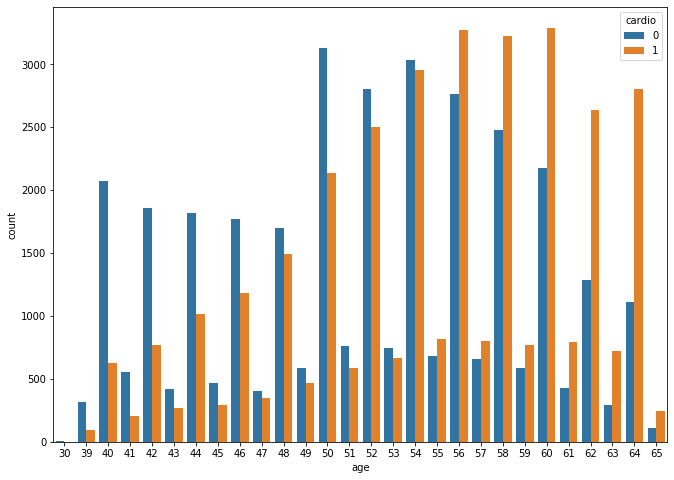

In [24]:
sns.countplot(x='age', hue='cardio', data = df)

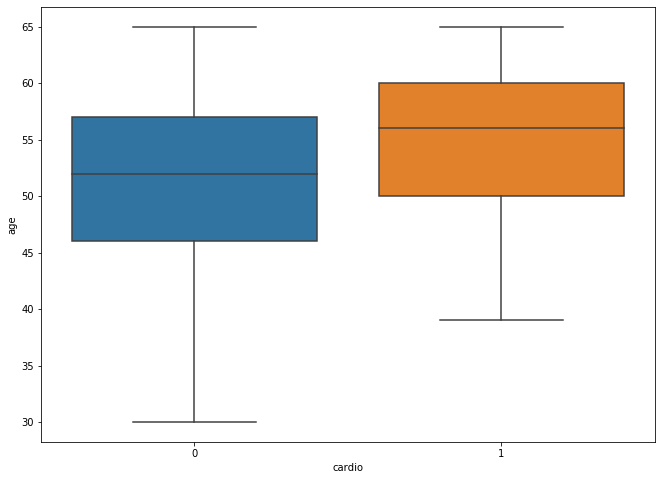

In [25]:
sns.boxplot(x='cardio',y='age',data=df)

In [26]:
cardio = df[df.cardio == 1]
noncardio = df[df.cardio == 0]

In [27]:
rcParams['figure.figsize'] = 11, 8

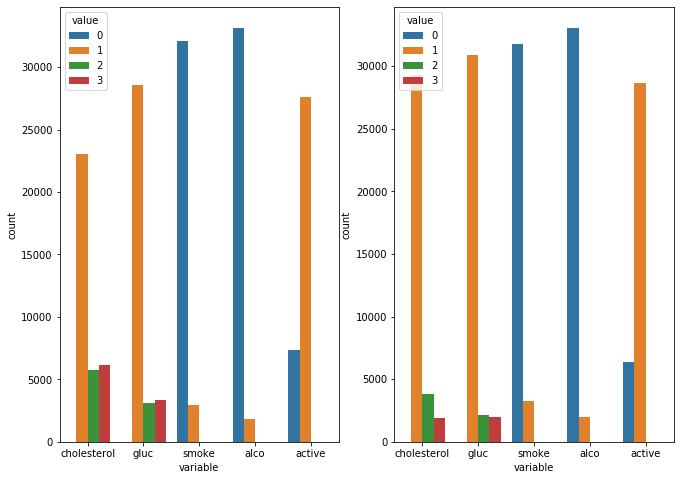

In [28]:
fig, ax =plt.subplots(1,2)
cardio_cate = cardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(cardio_cate),ax=ax[0])
noncardio_cate = noncardio.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(noncardio_cate),ax=ax[1])

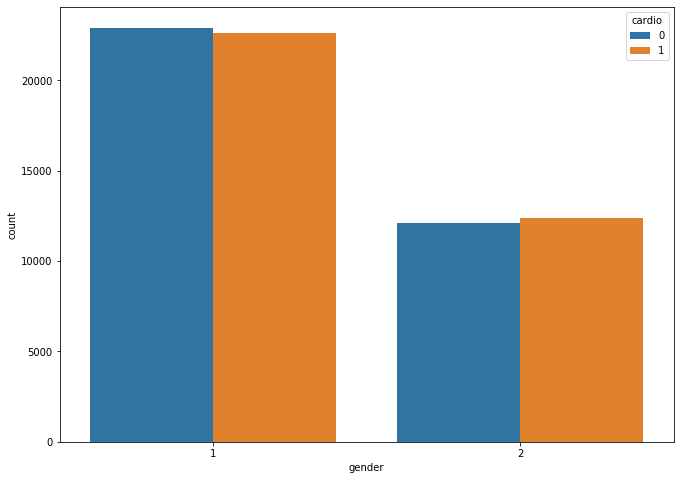

In [29]:
sns.countplot(x='gender', hue='cardio', data = df)

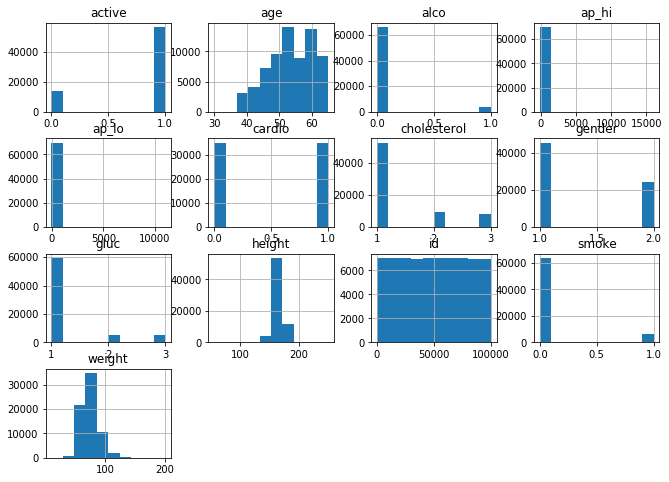

In [30]:
df.hist()
plt.show()

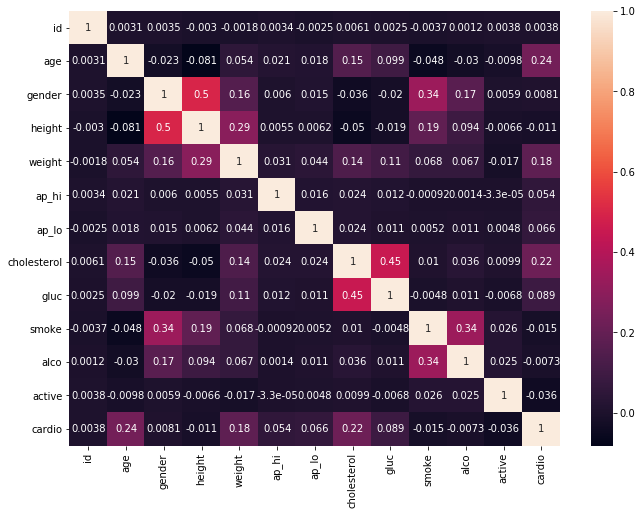

In [31]:
corr = df.corr()
f, ax = plt.subplots()
sns.heatmap(corr, annot=True, ax=ax)

In [32]:
cardio_corr = df.corr()['cardio'].drop('cardio').sort_values(ascending=False).abs()
cardio_corr

age            0.237749
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco           0.007330
height         0.010821
smoke          0.015486
active         0.035653
Name: cardio, dtype: float64

In [33]:
##logistic regression model

In [34]:
threshold = [0.002, 0.005, 0.01, 0.05, 0.1, 0.2]

In [35]:
for i in threshold:
    print(cardio_corr[cardio_corr > i].index)

Index(['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender',
       'id', 'alco', 'height', 'smoke', 'active'],
      dtype='object')
Index(['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'gender',
       'alco', 'height', 'smoke', 'active'],
      dtype='object')
Index(['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi', 'height',
       'smoke', 'active'],
      dtype='object')
Index(['age', 'cholesterol', 'weight', 'gluc', 'ap_lo', 'ap_hi'], dtype='object')
Index(['age', 'cholesterol', 'weight'], dtype='object')
Index(['age', 'cholesterol'], dtype='object')


In [36]:
model = LogisticRegression()

In [37]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
FPR_lst = []
TPR_lst = []
FDR_lst = []

for i in threshold:
    features = cardio_corr[cardio_corr > i].index
    model.fit(X_train[features],y_train)
    prediction = model.predict(X_test[features])
    
    TP_ = np.logical_and(prediction, y_test)
    FP_ = np.logical_and(prediction, np.logical_not(y_test))
    TN_ = np.logical_and(np.logical_not(prediction), np.logical_not(y_test))
    FN_ = np.logical_and(np.logical_not(prediction), y_test)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    FPR = FP/(FP+TN)
    FPR_lst.append(FPR)
    
    TPR = TP/(TP+FN)
    TPR_lst.append(TPR)

    FDR = FP/(FP+TP)
    FDR_lst.append(FDR)

    print(accuracy_score(prediction, y_test))

0.7053333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7073333333333334


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.704952380952381
0.7174761904761905
0.6373333333333333
0.6217142857142857


In [39]:
FPR_lst, TPR_lst

([0.22613987635239569,
  0.2481646058732612,
  0.24777820710973725,
  0.22826506955177744,
  0.3234157650695518,
  0.3422527047913447],
 [0.6387114951164538,
  0.6640683696468821,
  0.6589969947407964,
  0.664725770097671,
  0.5991735537190083,
  0.5866829451540195])

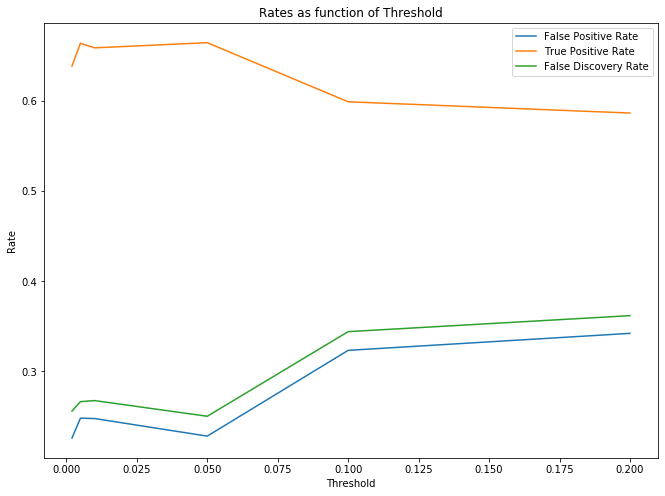

In [40]:
# line 1 points
x1 = threshold
y1 = FPR_lst
# plotting the line 1 points 
plt.plot(x1, y1, label = "False Positive Rate")


# line 2 points
x2 = threshold
y2 = TPR_lst
# plotting the line 2 points 
plt.plot(x2, y2, label = "True Positive Rate")

# line 3 points
x3 = threshold
y3 = FDR_lst
# plotting the line 2 points 
plt.plot(x3, y3, label = "False Discovery Rate")

plt.xlabel('Threshold')
# Set the y axis label of the current axis.
plt.ylabel('Rate')
# Set a title of the current axes.
plt.title('Rates as function of Threshold')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [41]:
## coefficient

from statsmodels.discrete.discrete_model import Logit

Logit(y_train,X_train).fit().summary()

Optimization terminated successfully.
         Current function value: 0.601520
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 cardio   No. Observations:                49000
Model:                          Logit   Df Residuals:                    48988
Method:                           MLE   Df Model:                           11
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                  0.1322
Time:                        23:10:26   Log-Likelihood:                -29474.
converged:                       True   LL-Null:                       -33963.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
id              -7e-07   3.43e-07     -2.041      0.041   -1.37e-06   -2.78e-08
age             0.0359      0.001     24.915      0.000       0.033       0.039
gender          0.2842      0.024     11.970      0.000       0.238       0.331
height         -0.0501      0.001    -68.739      0.000      -0.052      -0.049
weight          0.0184      0.001     23.600      0.000       0.017       0.020
ap_hi           0.0343      0.001     50.434      0.000       0.033       0.036
ap_lo           0.0004   9.21e-05      4.500      0.000       0.000       0.001
cholesterol     0.5024      0.018     28.449      0.000       0.468       0.537
gluc           -0.1465      0.020     -7.333      0.000      -0.186      -0.107
smoke          -0.1072      0.039     -2.759      0.006      -0.183      -0.031
alco           -0.1353      0.047     -2.863      0.004      -0.228      -0.043
active         -0.2972      0.025    -12.018      0.000      -0.346      -0.249
===============================================================================
"""

# functions

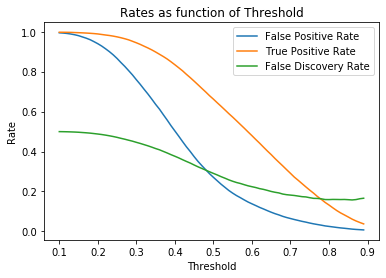

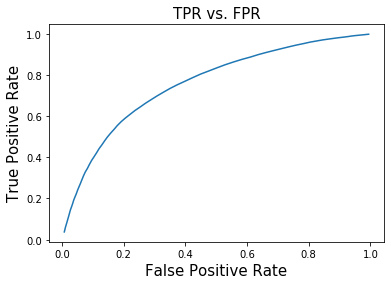

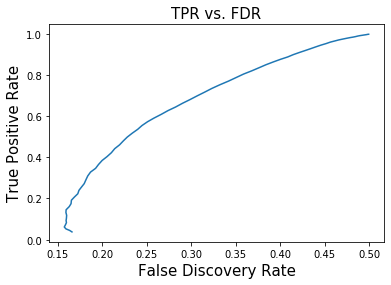

In [6]:
temp = prediction_model('../data/cardio_train.csv')

In [7]:
temp.head()

,threshold,TPR,FPR,FDR
0,0.10,0.997227,0.994460,0.499606
1,0.11,0.997084,0.993147,0.499311
2,0.12,0.996827,0.991177,0.498879
3,0.13,0.996512,0.988350,0.498244
4,0.14,0.995712,0.984666,0.497511


In [2]:
def prediction_model(path):
    
    df = pd.read_csv(path, sep=';')
    X = df.drop(['cardio'], axis=1)
    y = df['cardio']

    
    FPR_lst = []
    TPR_lst = []
    FDR_lst = []
    scores = []
    threshold = np.arange(0.1,0.9,0.01)

    clf = LogisticRegression(class_weight="balanced")
    clf.fit(X, y)

    for i in threshold:

        preds = pd.Series(clf.predict_proba(X)[:,1])
        preds[preds >= i] = 1
        preds[preds < i] = 0

        TP_ = np.logical_and(preds, y)
        FP_ = np.logical_and(preds, np.logical_not(y))
        TN_ = np.logical_and(np.logical_not(preds), np.logical_not(y))
        FN_ = np.logical_and(np.logical_not(preds), y)

        TP = sum(TP_)
        FP = sum(FP_)
        TN = sum(TN_)
        FN = sum(FN_)

        FPR = FP/(FP+TN)
        FPR_lst.append(FPR)

        TPR = TP/(TP+FN)
        TPR_lst.append(TPR)

        FDR = FP/(FP+TP)
        FDR_lst.append(FDR)

        scores.append(accuracy_score(preds, y))
        
    plot_rates(threshold, FPR_lst, TPR_lst, FDR_lst)
    plot_TPR_FPR(FPR_lst, TPR_lst)
    plot_TPR_FDR(TPR_lst, FDR_lst)
    return pd.DataFrame(data={'threshold':threshold,'TPR':TPR_lst,'FPR':FPR_lst,'FDR':FDR_lst})

In [3]:
## helper function
def plot_rates(threshold, FPR_lst, TPR_lst, FDR_lst):  
    # line 1 points
    x1 = threshold
    y1 = FPR_lst
    # plotting the line 1 points 
    plt.plot(x1, y1, label = "False Positive Rate")


    # line 2 points
    x2 = threshold
    y2 = TPR_lst
    # plotting the line 2 points 
    plt.plot(x2, y2, label = "True Positive Rate")

    # line 3 points
    x3 = threshold
    y3 = FDR_lst
    # plotting the line 2 points 
    plt.plot(x3, y3, label = "False Discovery Rate")

    plt.xlabel('Threshold')
    # Set the y axis label of the current axis.
    plt.ylabel('Rate')
    # Set a title of the current axes.
    plt.title('Rates as function of Threshold')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.show()

In [4]:
## helper function
def plot_TPR_FPR(FPR_lst, TPR_lst):
    ## TPR vs. FPR
    plt.plot(FPR_lst,TPR_lst)
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('TPR vs. FPR',fontsize=15)
    plt.show()

In [5]:
## helper function
def plot_TPR_FDR(TPR_lst, FDR_lst):
    ## TPR vs. FDR
    plt.plot(FDR_lst,TPR_lst)
    plt.xlabel('False Discovery Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('TPR vs. FDR',fontsize=15)
    plt.show()

# functions end

In [ ]:
FPR_lst = []
TPR_lst = []
FDR_lst = []
scores = []
threshold = np.arange(0.1,0.9,0.01)

clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)

for i in threshold:

    preds = pd.Series(clf.predict_proba(X_test)[:,1])
    preds[preds >= i] = 1
    preds[preds < i] = 0
    
    TP_ = np.logical_and(preds, y_test)
    FP_ = np.logical_and(preds, np.logical_not(y_test))
    TN_ = np.logical_and(np.logical_not(preds), np.logical_not(y_test))
    FN_ = np.logical_and(np.logical_not(preds), y_test)
    
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    
    FPR = FP/(FP+TN)
    FPR_lst.append(FPR)
    
    TPR = TP/(TP+FN)
    TPR_lst.append(TPR)

    FDR = FP/(FP+TP)
    FDR_lst.append(FDR)

    scores.append(accuracy_score(preds, y_test))

In [ ]:
scores_df = pd.DataFrame(data = {'threshold':threshold, 'accuracy score': scores})
scores_df.loc[30:50]

In [ ]:
scores_df.iloc[scores_df.idxmax()[1]]

### sklearn.metrics.accuracy_score: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. Formula: (N-type1-type2)/N

In [ ]:
# line 1 points
x1 = threshold
y1 = FPR_lst
# plotting the line 1 points 
plt.plot(x1, y1, label = "False Positive Rate")


# line 2 points
x2 = threshold
y2 = TPR_lst
# plotting the line 2 points 
plt.plot(x2, y2, label = "True Positive Rate")

# line 3 points
x3 = threshold
y3 = FDR_lst
# plotting the line 2 points 
plt.plot(x3, y3, label = "False Discovery Rate")

plt.xlabel('Threshold')
# Set the y axis label of the current axis.
plt.ylabel('Rate')
# Set a title of the current axes.
plt.title('Rates as function of Threshold')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
rate_df = pd.DataFrame(data={'threshold':threshold,'TPR':TPR_lst,'FPR':FPR_lst,'FDR':FDR_lst})
rate_df.head()

In [ ]:
## TPR vs. FPR

## 45 degree line intercept
plt.plot(FPR_lst,TPR_lst)
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('TPR vs. FPR',fontsize=15)

In [ ]:
## TPR vs. FDR
plt.plot(FDR_lst,TPR_lst)
plt.xlabel('False Discovery Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('TPR vs. FDR',fontsize=15)

### TPR of 0.703700 at threshold of 0.48 seems to be a good blalance point between TPR vs. FPR and TPR vs. FDR

In [ ]:
## optimal point is somewhere between 0.6 and 0.8 in this plot
rate_df[(rate_df['TPR'] >= 0.5) & (rate_df['TPR'] <= 0.8)]

In [ ]:
rate_df.head()

In [ ]:
temp.loc[30:50]